In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [30]:
Equities = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'SBIN.NS', 'ASIANPAINT.NS', 'BHARTIARTL.NS', 'TM', 'JNJ', 'HINDUNILVR.NS']

[*********************100%***********************]  1 of 1 completed


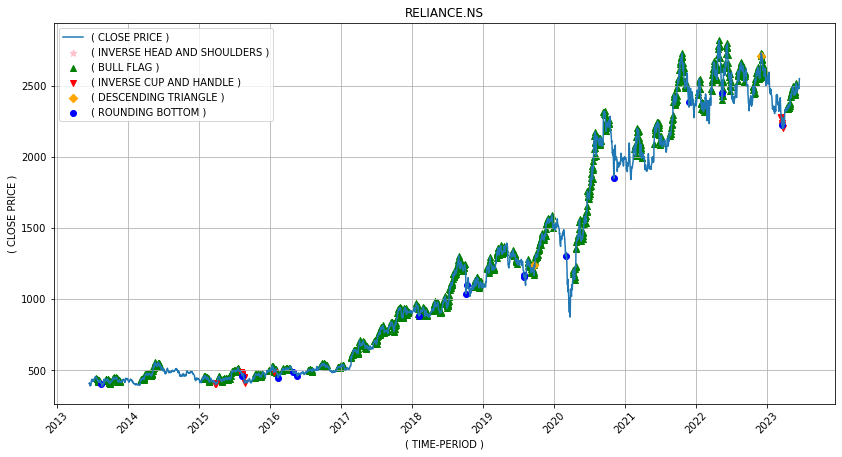

[*********************100%***********************]  1 of 1 completed


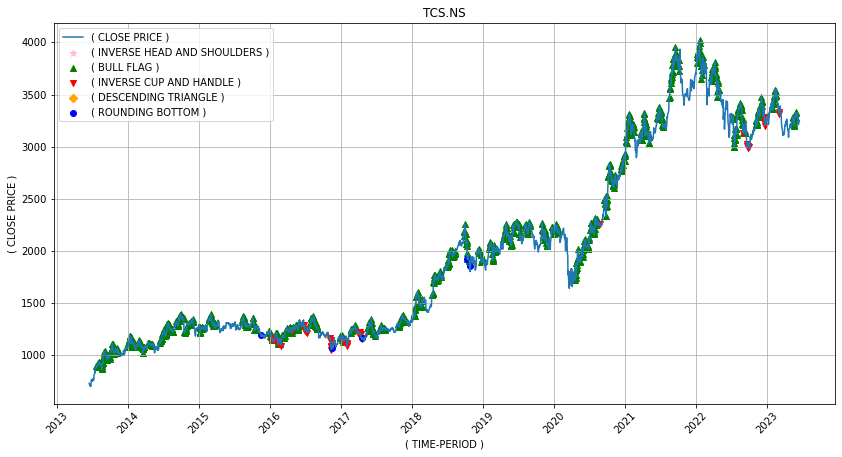

[*********************100%***********************]  1 of 1 completed


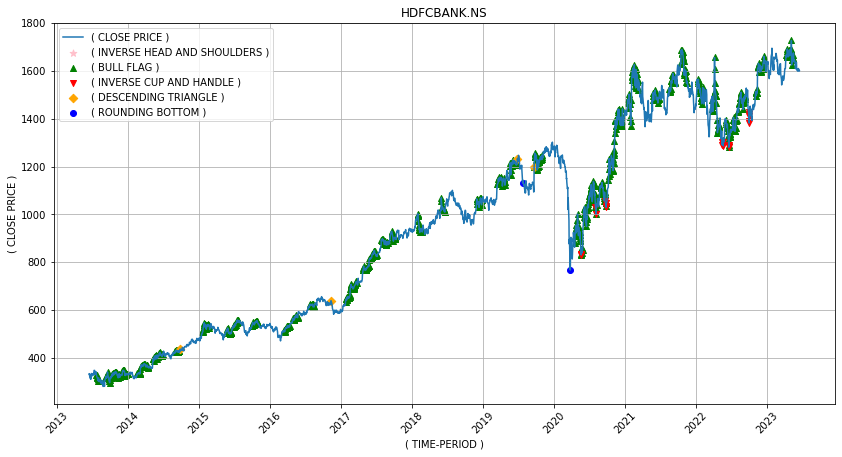

[*********************100%***********************]  1 of 1 completed


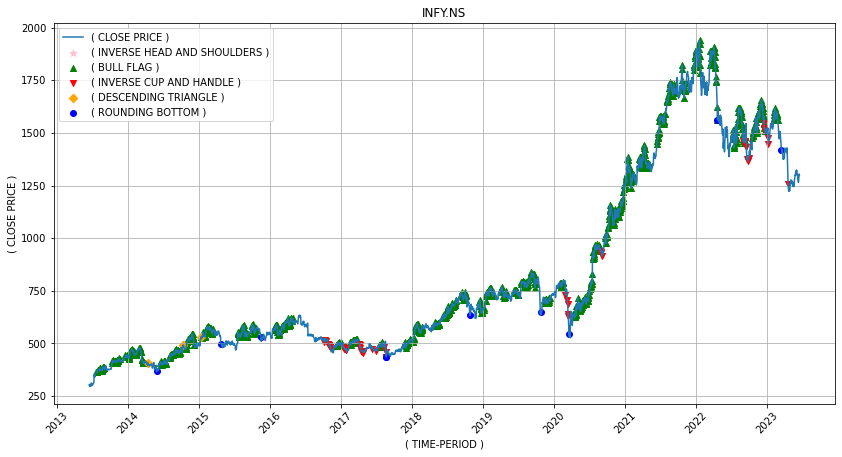

[*********************100%***********************]  1 of 1 completed


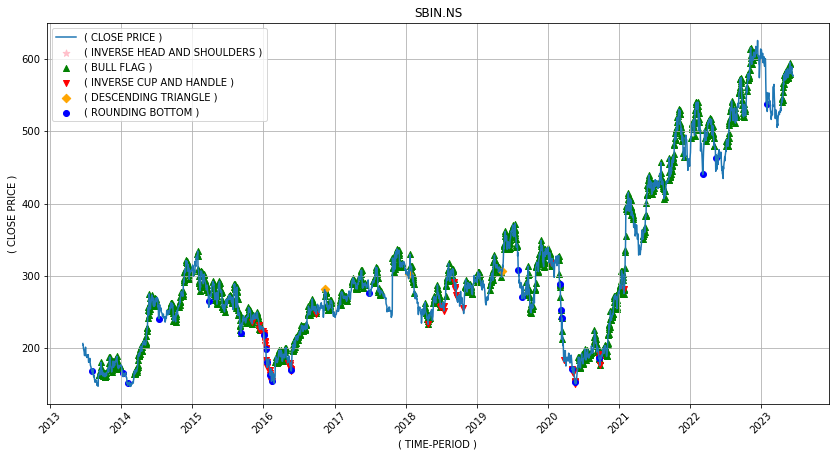

[*********************100%***********************]  1 of 1 completed


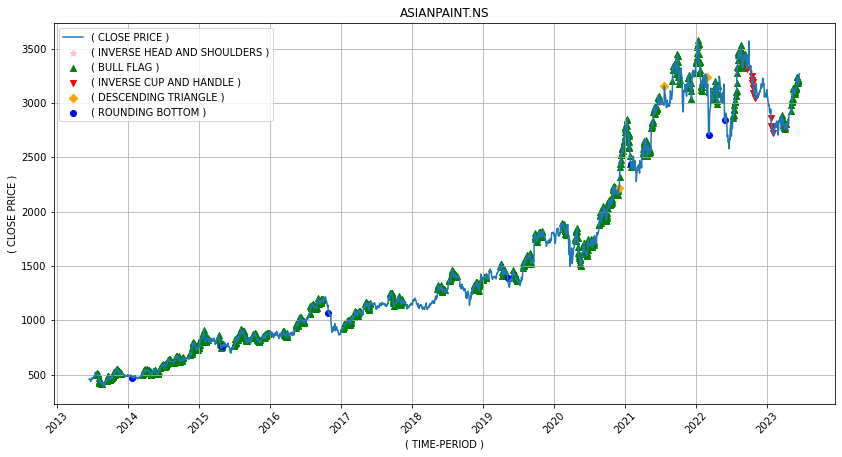

[*********************100%***********************]  1 of 1 completed


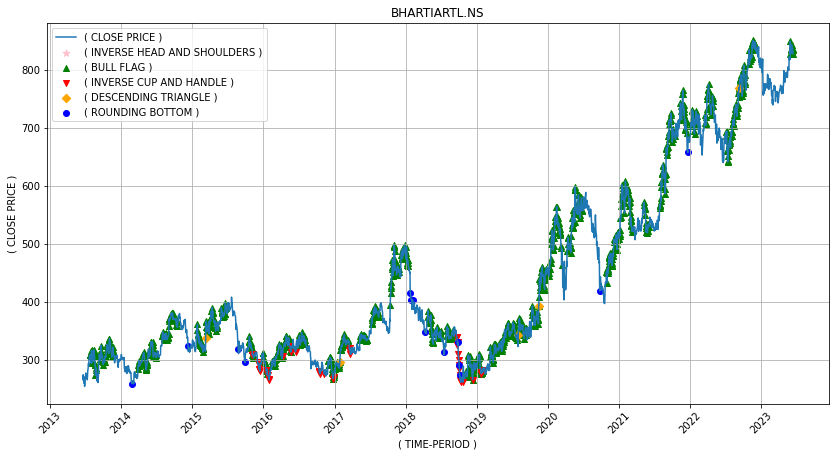

[*********************100%***********************]  1 of 1 completed


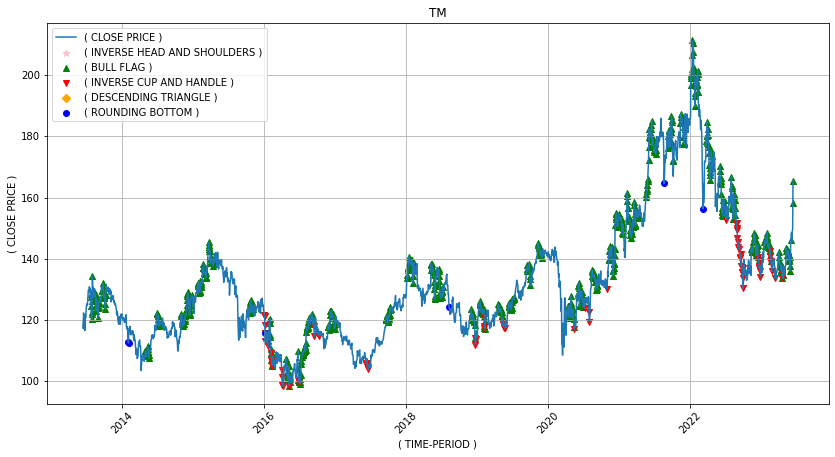

[*********************100%***********************]  1 of 1 completed


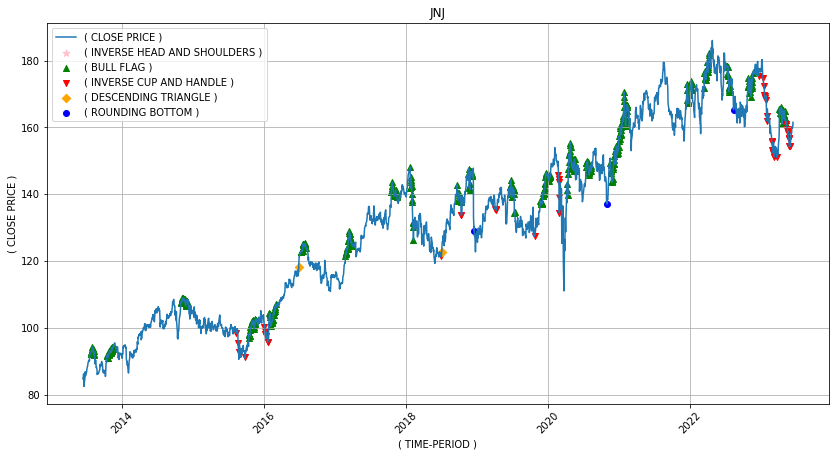

[*********************100%***********************]  1 of 1 completed


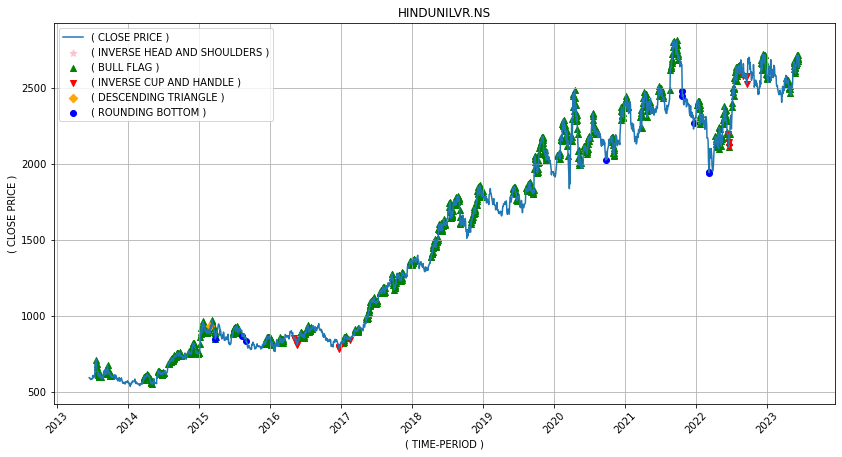

In [56]:
for equity in Equities:
    data = yf.download(equity, start='2013-06-15', end='2023-06-15')

    # SIMPLE MOVING AVERAGE
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    # DESCENDING TRIANGLE
    window_size = 14
    data['RollingHigh'] = data['High'].rolling(window=window_size).max()
    data['RollingLow'] = data['Low'].rolling(window=window_size).min()
    descending_triangle = (data['High'] == data['RollingHigh']) & (data['Low'].shift() == data['RollingLow'].shift())
    data['DescendingTriangle'] = descending_triangle.astype(int)


    # BULL FLAG
    window_size = 14
    percentage_threshold = 6 # Minimum percentage change for bull flag pattern
    data['PercentageChange'] = data['Close'].pct_change(periods=window_size) * 100
    bull_flag = (data['PercentageChange'].rolling(window=window_size).max() >= percentage_threshold)
    data['BullFlag'] = bull_flag.astype(int)
    
    # INVERSE CUP AND HANDLE
    cup_handle_window = 21
    sma_50_window = 50
    sma_200_window = 200

    cup_handle_pattern = (
        (data['Low'].rolling(window=cup_handle_window).min() == data['Low']) &
        (data['SMA_50'].rolling(window=sma_50_window).min() < data['SMA_200'].rolling(window=sma_200_window).min())
    )
    data['InverseCupHandle'] = cup_handle_pattern.astype(int)

    # INVERSE HEAD AND SHOULDERS
    head_shoulder_window = 30
    
    # Calculate the minimum values for the lows
    min_lows = data['Low'].rolling(window=head_shoulder_window).min()
    
    # Identify the three lows for the inverse head and shoulders pattern
    left_low = (min_lows.shift(2) > min_lows.shift(1)) & (min_lows.shift(1) < min_lows)
    head = (min_lows.shift(2) > min_lows.shift(1)) & (min_lows.shift(1) > min_lows)
    right_low = (min_lows.shift(2) < min_lows.shift(1)) & (min_lows.shift(1) < min_lows)
    
    # Combine the conditions to identify the inverse head and shoulders pattern
    inverse_head_shoulders = left_low & head & right_low
    
    data['InverseHeadShoulder'] = inverse_head_shoulders.astype(int)

    # ROUNDING BOTTOM
    rounding_bottom_window = 30
    
    # Calculate the minimum values for the lows
    min_lows = data['Low'].rolling(window=rounding_bottom_window).min()
    
    # Identify the gradual, rounded curvature for the rounding bottom pattern
    rounding_bottom = (min_lows.shift(2) > (1.01)*min_lows.shift(1)) & (min_lows.shift(1) > (1.01)*min_lows) &(min_lows.shift(2)-min_lows.shift(1) > min_lows.shift(1)-min_lows)
    
    data['RoundingBottom'] = rounding_bottom.astype(int)

    # STOCK CHART
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='( CLOSE PRICE )')

    # PATTERN MARKERS
    plt.scatter(data[data['InverseHeadShoulder'] == 1].index, data[data['InverseHeadShoulder'] == 1]['Close'], marker='*', color='pink', s=50, label='( INVERSE HEAD AND SHOULDERS )')
    plt.scatter(data[data['BullFlag'] == 1].index, data[data['BullFlag'] == 1]['Close'], marker='^', color='green', label='( BULL FLAG )')
    plt.scatter(data[data['InverseCupHandle'] == 1].index, data[data['InverseCupHandle'] == 1]['Close'], marker='v', color='red', label='( INVERSE CUP AND HANDLE )')
    plt.scatter(data[data['DescendingTriangle'] == 1].index, data[data['DescendingTriangle'] == 1]['Close'], marker='D', color='orange', label='( DESCENDING TRIANGLE )')
    plt.scatter(data[data['RoundingBottom'] == 1].index, data[data['RoundingBottom'] == 1]['Close'], marker='o', color='blue', label='( ROUNDING BOTTOM )')
    plt.title(equity )
    plt.xlabel('( TIME-PERIOD )')
    plt.ylabel('( CLOSE PRICE )')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
